# Good and Bad Customers for Granting Credit - Classification Model

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing the dataset

In [2]:
dataset = pd.read_csv("BankCreditCard.csv")

### checking the head of the dataset

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
dataset.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


#### Check for Null value

In [5]:
dataset.isnull().sum()     # No missing value observed

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

#### check for the variable data type ot categorical features

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

### check for imbalance in dataset

In [7]:
dataset['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

## Non graphical / statistical EDA

In [8]:
dataset.describe(include= 'all')

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000
mean,15000.500000,1.929173e+05,1.603733,1.855933,1.551867,35.485500,0.355200,0.319300,0.302967,0.25670,0.219500,0.224900,81581.060100,52517.103000,5.900389e+04,55122.263933,39939.618800,38506.051533,6285.653867,7.466544e+03,5836.140567,5127.687433,5261.19120,5215.502567,0.221200
std,8660.398374,1.322888e+05,0.489129,0.794397,0.521970,9.217904,0.746984,0.796012,0.781792,0.74388,0.699954,0.700573,123026.372701,80401.365192,8.841747e+04,83577.329356,60373.934792,59104.280171,18944.920299,3.467950e+04,20696.306703,17103.762740,16989.50685,17777.465775,0.415062
min,1.000000,2.000000e+04,1.000000,1.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-365580.000000,-58777.000000,-2.572640e+05,-270000.000000,-81334.000000,-338603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000
25%,7500.750000,5.000000e+04,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,3890.000000,3517.000000,2.876000e+03,2671.500000,1763.000000,1256.000000,1000.000000,7.700000e+02,550.000000,333.000000,310.00000,117.750000,0.000000
50%,15000.500000,2.200000e+05,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,35661.500000,30538.000000,2.656800e+04,25629.000000,18043.000000,17071.000000,3000.000000,2.542000e+03,1900.000000,1500.000000,1539.00000,1500.000000,0.000000
75%,22500.250000,2.700000e+05,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,67091.000000,57420.500000,6.025250e+04,54508.500000,50190.500000,48655.250000,6000.000000,5.000000e+03,5500.000000,4013.250000,5000.00000,4000.000000,0.000000
max,30000.000000,2.000000e+06,2.000000,6.000000,3.000000,79.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,964533.000000,883831.000000,2.664089e+06,992596.000000,827171.000000,861664.000000,973663.000000,2.674259e+06,999055.000000,538897.000000,536539.00000,528666.000000,1.000000


In [9]:
dataset.corr()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
Customer ID,1.000000,0.026884,0.018497,0.039828,-0.029079,0.018678,-0.020016,-0.009494,-0.018233,0.013914,-0.020911,-0.033201,0.014824,0.020680,0.019882,0.035671,0.016959,0.016620,0.009667,0.008546,0.037526,0.008646,0.003044,0.003000,-0.013952
Credit_Amount,0.026884,1.000000,0.039800,-0.213506,-0.104797,0.135357,-0.174325,-0.200720,-0.196130,-0.185646,-0.173779,-0.168446,0.287284,0.280384,0.288211,0.298477,0.304191,0.300507,0.179265,0.141631,0.202709,0.187128,0.201680,0.206527,-0.156759
Gender,0.018497,0.039800,1.000000,0.012897,-0.031389,-0.090874,-0.034521,-0.044876,-0.041174,-0.039701,-0.038613,-0.032042,-0.028792,-0.030322,-0.022342,-0.020222,-0.016988,-0.016661,-0.000450,-0.000724,-0.007833,-0.002471,-0.001337,-0.002766,-0.039961
Academic_Qualification,0.039828,-0.213506,0.012897,1.000000,-0.141637,0.175458,0.049837,0.054034,0.044626,0.043856,0.032593,0.021863,0.022945,0.014368,0.012281,0.000233,-0.009492,-0.011344,-0.036724,-0.024299,-0.037803,-0.037529,-0.039920,-0.037448,0.025985
Marital,-0.029079,-0.104797,-0.031389,-0.141637,1.000000,-0.414170,-0.011686,-0.009814,0.000334,-0.004372,-0.003106,0.002056,-0.025129,-0.022228,-0.024802,-0.022968,-0.025466,-0.021300,-0.006659,-0.005525,-0.003442,-0.013082,-0.000316,-0.006641,-0.024339
Age_Years,0.018678,0.135357,-0.090874,0.175458,-0.414170,1.000000,-0.001731,-0.008871,-0.014417,-0.007554,-0.013825,-0.017838,0.049506,0.055387,0.048118,0.046557,0.049390,0.047581,0.025527,0.017073,0.029415,0.019102,0.020990,0.019478,0.013890
Repayment_Status_Jan,-0.020016,-0.174325,-0.034521,0.049837,-0.011686,-0.001731,1.000000,0.693003,0.514561,0.458840,0.424479,0.374067,-0.007562,0.004704,0.008045,0.014829,0.028830,0.028195,-0.077731,-0.049604,-0.060884,-0.061679,-0.052780,-0.049247,0.401235
Repayment_Status_Feb,-0.009494,-0.200720,-0.044876,0.054034,-0.009814,-0.008871,0.693003,1.000000,0.665755,0.516174,0.466563,0.409739,0.008046,0.012422,0.020038,0.027517,0.039775,0.041686,-0.095057,-0.047360,-0.057354,-0.052995,-0.047588,-0.043179,0.328722
Repayment_Status_March,-0.018233,-0.196130,-0.041174,0.044626,0.000334,-0.014417,0.514561,0.665755,1.000000,0.676816,0.545319,0.485370,-0.019061,-0.001877,0.002878,0.014783,0.027169,0.029943,-0.037527,-0.062930,-0.054400,-0.051804,-0.049878,-0.048582,0.288308
Repayment_Status_April,0.013914,-0.185646,-0.039701,0.043856,-0.004372,-0.007554,0.458840,0.516174,0.676816,1.000000,0.733334,0.585659,-0.020643,-0.012412,0.004098,0.014207,0.029246,0.035272,-0.052848,-0.033120,-0.071102,-0.054316,-0.052649,-0.049148,0.271371


### Graphical EDA

<AxesSubplot:>

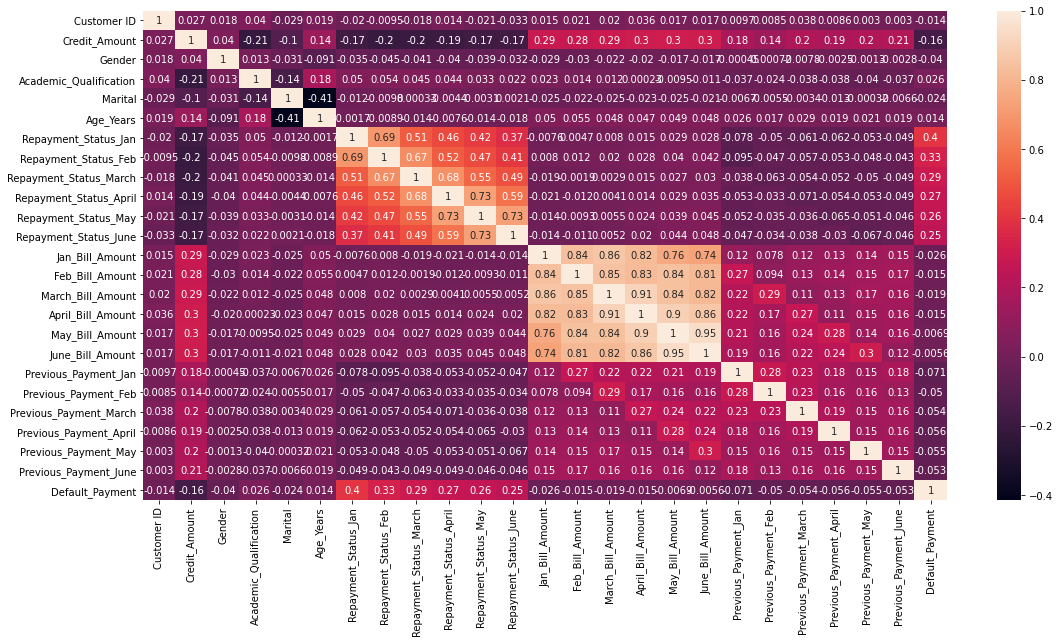

In [10]:
plt.figure(figsize= (18,9))
sns.heatmap(dataset.corr(), annot= True)

<AxesSubplot:xlabel='Credit_Amount'>

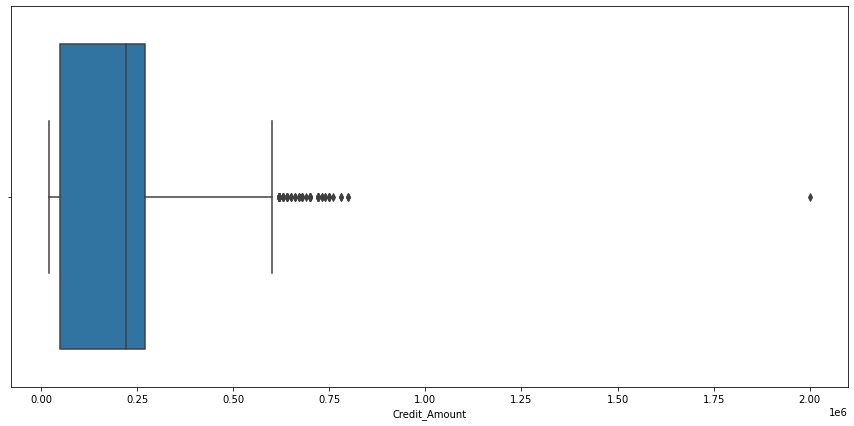

In [11]:
plt.figure(figsize= (15,7))
sns.boxplot(x=dataset['Credit_Amount'])

<AxesSubplot:xlabel='Credit_Amount', ylabel='Gender'>

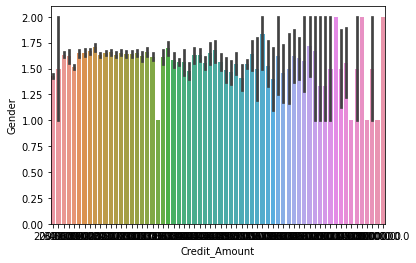

In [12]:
sns.barplot(x=dataset['Credit_Amount'], y= dataset['Gender'])

<AxesSubplot:xlabel='Default_Payment', ylabel='Age_Years'>

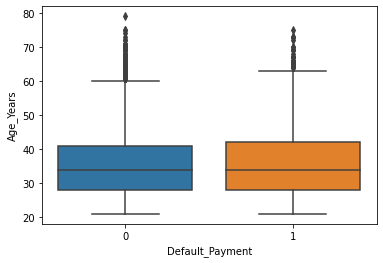

In [13]:
sns.boxplot(x= 'Default_Payment', y = 'Age_Years', data= dataset)

<AxesSubplot:xlabel='Default_Payment', ylabel='Age_Years'>

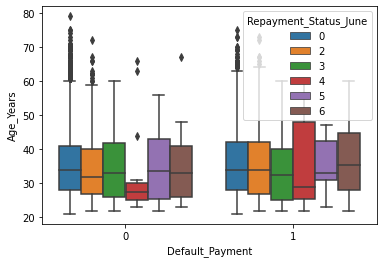

In [14]:
sns.boxplot(x= 'Default_Payment', y = 'Age_Years', hue = 'Repayment_Status_June', data= dataset)

<AxesSubplot:xlabel='Default_Payment', ylabel='count'>

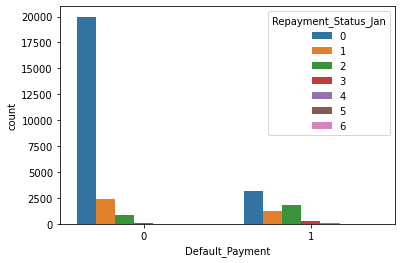

In [15]:
sns.countplot(x= 'Default_Payment', hue = 'Repayment_Status_Jan', data= dataset)

In [16]:
import pandas_profiling
from pandas_profiling import ProfileReport

In [18]:
profile = ProfileReport(dataset, title='Pandas Profiling Report', explorative=True)

In [74]:
# profile.to_notebook_iframe() #used to check/display profile report

In [21]:
profile.to_file(output_file="your_report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Divide the dataset between independent and dependent variable

In [22]:
x= dataset.drop('Default_Payment', axis=1)

In [23]:
y = dataset['Default_Payment']

## Feature extraction

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
FE = ExtraTreesRegressor()

In [25]:
FE.fit(x,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [27]:
print(FE.feature_importances_)

[0.07033123 0.05645044 0.01787758 0.03632628 0.02543077 0.06668987
 0.11817884 0.04022683 0.02558776 0.01981187 0.01356732 0.01437608
 0.04699912 0.04105098 0.03803879 0.03932043 0.03852129 0.03870057
 0.04240408 0.03981666 0.04136989 0.04002052 0.04262306 0.04627975]


In [29]:
feature_plot = pd.Series(FE.feature_importances_, index = x.columns)

<AxesSubplot:>

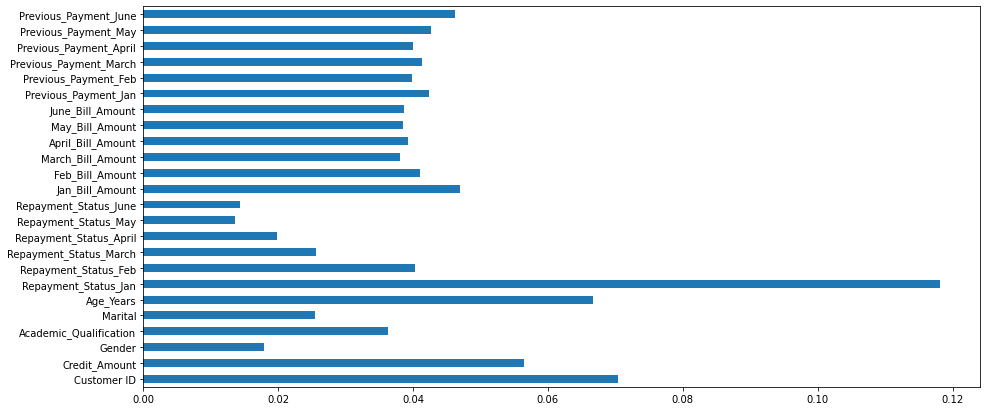

In [31]:
plt.figure(figsize=(15,7))
feature_plot.plot.barh(stacked=True)

#### Note: from this plot , we can see few features like "repayment status june" , "Gender" are not having so much importance on dependent variable, so we can drop them but first we will check multicollinearity also

## Checking the multicollinearity

In [33]:
import statsmodels.api as sm

In [34]:
x= sm.add_constant(x)

In [35]:
x.head()

,const,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,Repayment_Status_May,Repayment_Status_June,Jan_Bill_Amount,Feb_Bill_Amount,March_Bill_Amount,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June
0,1.0,1,20000.0,2,2,1,24,2,2,0,0,0,0,3933.0,3103.0,689.0,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0
1,1.0,2,220000.0,2,2,2,26,0,2,0,0,0,2,3683.0,1735.0,2682.0,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0
2,1.0,3,90000.0,2,2,2,34,0,0,0,0,0,0,39339.0,14037.0,23559.0,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0
3,1.0,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48333.0,49292.0,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0
4,1.0,5,50000.0,1,2,1,57,0,0,0,0,0,0,8637.0,5570.0,35835.0,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0


In [37]:
model= sm.OLS(y,x).fit()

In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Default_Payment   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     283.7
Date:                Fri, 22 Jan 2021   Prob (F-statistic):               0.00
Time:                        18:16:39   Log-Likelihood:                -13117.
No. Observations:               30000   AIC:                         2.628e+04
Df Residuals:                   29975   BIC:                         2.649e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2299      0.018     12.931      0.000       0.195       0.265
Customer ID            -1.184e-07   2.51e-07     -0.471      0.638   -6.11e-07    3.74e-07
Credit_Amount          -2.254e-07   1.92e-08    -11.735      0.000   -2.63e-07   -1.88e-07
Gender                    -0.0157      0.004     -3.503      0.000      -0.024      -0.007
Academic_Qualification    -0.0102      0.003     -3.541      0.000      -0.016      -0.005
Marital                   -0.0189      0.005     -4.115      0.000      -0.028      -0.010
Age_Years                  0.0009      0.000      3.244      0.001       0.000       0.001
Repayment_Status_Jan       0.1682      0.004     41.099      0.000       0.160       0.176
Repayment_Status_Feb       0.0132      0.004      3.017      0.003       0.005       0.022
Repayment_Status_March     0.0222      0.004      5.071      0.000       0.014       0.031
Repayment_Status_April     0.0120      0.005      2.430      0.015       0.002       0.022
Repayment_Status_May       0.0180      0.005      3.300      0.001       0.007       0.029
Repayment_Status_June      0.0311      0.005      6.764      0.000       0.022       0.040
Jan_Bill_Amount        -7.557e-08   4.07e-08     -1.857      0.063   -1.55e-07     4.2e-09
Feb_Bill_Amount         1.946e-07   6.61e-08      2.944      0.003    6.51e-08    3.24e-07
March_Bill_Amount        2.27e-08   8.37e-08      0.271      0.786   -1.41e-07    1.87e-07
April_Bill_Amount      -5.975e-08   8.91e-08     -0.671      0.502   -2.34e-07    1.15e-07
May_Bill_Amount        -9.932e-08    1.6e-07     -0.622      0.534   -4.12e-07    2.13e-07
June_Bill_Amount         1.28e-07   1.39e-07      0.919      0.358   -1.45e-07    4.01e-07
Previous_Payment_Jan   -5.493e-07   1.31e-07     -4.190      0.000   -8.06e-07   -2.92e-07
Previous_Payment_Feb   -9.337e-08   7.89e-08     -1.183      0.237   -2.48e-07    6.14e-08
Previous_Payment_March -2.675e-08   1.28e-07     -0.210      0.834   -2.77e-07    2.23e-07
Previous_Payment_April -2.324e-07   1.51e-07     -1.542      0.123   -5.28e-07     6.3e-08
Previous_Payment_May   -3.264e-07   1.62e-07     -2.019      0.044   -6.43e-07   -9.48e-09
Previous_Payment_June  -2.094e-07   1.31e-07     -1.601      0.109   -4.66e-07    4.69e-08
==============================================================================
Omnibus:                     4805.034   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7452.168
Skew:                           1.163   Prob(JB):                         0.00
Kurtosis:                       3.744   Cond. No.                     2.54e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance mat

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [42]:
print(vif)

[67.51757697151285, 1.012094973285162, 1.3781519035813443, 1.022785696152917, 1.120486747565335, 1.2302400888014633, 1.271162415097709, 1.9966220611002514, 2.60741760944953, 2.506805671673613, 2.8748618373672374, 3.1075087570302173, 2.2113350378353456, 5.352913200938077, 6.030109555674032, 11.702833360685323, 11.828009040293173, 19.824290273122354, 14.471080352413932, 1.3172368935083871, 1.6004343615989864, 1.4885314097438345, 1.4181981025737256, 1.6116430372863282, 1.154091753947919]


<AxesSubplot:>

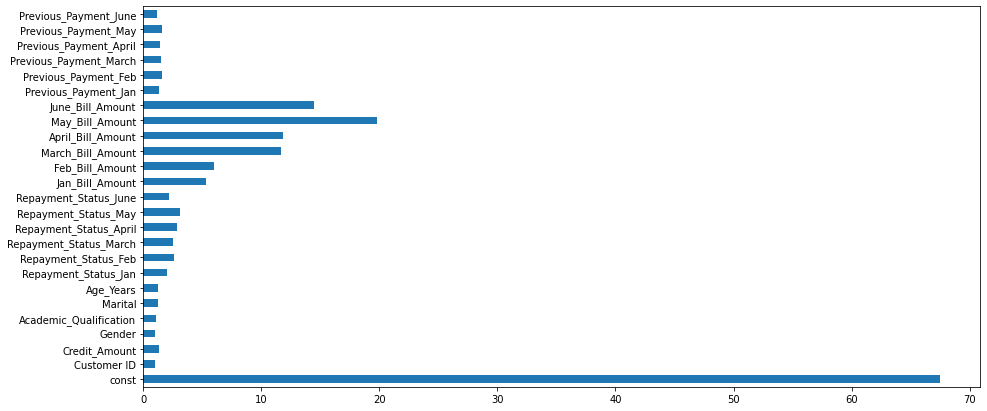

In [43]:
vif_plot = pd.Series(vif, index = x.columns)
plt.figure(figsize=(15,7))
vif_plot.plot.barh(stacked=True)

### now dropping  the features having vif > 10 

In [46]:
x.drop(['const', 'June_Bill_Amount', 'May_Bill_Amount'], axis=1, inplace= True)

## Divde the data into training & test data and the apply standard scaler

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

In [48]:
scaler = StandardScaler()

In [50]:
x_train= scaler.fit_transform(x_train)

In [53]:
x_test= scaler.transform(x_test)

### Now apply the Logistic regression classification model 

In [54]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [55]:
LR.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
yhat= LR.predict(x_test)

In [57]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [58]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7060
           1       0.68      0.31      0.42      1940

    accuracy                           0.82      9000
   macro avg       0.76      0.63      0.66      9000
weighted avg       0.80      0.82      0.79      9000



In [59]:
print(accuracy_score(y_test,yhat))

0.8198888888888889


In [61]:
print(roc_auc_score(y_test,yhat))

0.6345514149703572


In [62]:
print(confusion_matrix(y_test,yhat))

[[6780  280]
 [1341  599]]


## Using cross validation method

### building the pipeline

In [66]:
# define the pipeline
steps = list()
steps.append(('Scalar', StandardScaler()))
steps.append(('Model', LogisticRegression()))

In [67]:
from sklearn.pipeline import Pipeline
pipeline= Pipeline(steps= steps)

In [68]:
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [69]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(pipeline, x,y, scoring= 'accuracy', cv= cv, n_jobs=-1)

In [73]:
from numpy import mean
from numpy import std
print('Accuracy: %.3f (%.3f)' % (mean(accuracy)*100, std(accuracy)*100))

Accuracy: 81.854 (0.483)
